In [1]:
import sys
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.fft

os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.WFGenerator import *
import superrad

ulb = superrad.ultralight_boson.UltralightBoson(spin=1,model="relativistic")

In [2]:
# set initial parameters
M = 1e5
m = 1e1
mu = 2e-16
e0 = 0.1
p0 = GetInitialP(M,e0)
Phi_phi0 = 0.
Phi_theta0 =0.
Phi_r0 = 0.


a=0.8 #SMBH Spin
Y0=1. #Initial Inclincation
qS=np.pi #Sky Location Polar Angle in solar system barycenter coordinate system
phiS=0. #Sky Location Azimuthal Angle in solar system barycenter coordinate system
qK=np.pi/1.1 #Initial BH Spin Polar Angle in solar system barycenter coordinate system
phiK=0. #Initial BH Spin Azimuthal Angle in solar system barycenter coordinate system
dist=1. #Distance to source (Mpc)
mich=False #assume LISA long baseline response approximation

T=1 #LISA data run is 5 years. We set the max time to be longer because the proca cloud extends the inspiral time
dt=15 #time resolution in seconds

alphaval = alphavalue(M,mu)
print(r"alpha = {0}".format(alphaval))
print("initial p = {0}".format(p0))


use_gpu = False

# keyword arguments for inspiral generator (RunKerrGenericPn5Inspiral)
insp_kwargs = {
    "npoints": 110,  # we want a densely sampled trajectory
    "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
    "dense_output":True
}

# keyword arguments for summation generator (AAKSummation)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}


alpha = 0.14966276123144448
initial p = 35.1


In [3]:
WithoutProcaInspiralKwargs = insp_kwargs.copy()
WithoutProcaSumKwargs=sum_kwargs.copy()
withoutprocagen = EMRIWaveform(inspiral_kwargs=WithoutProcaInspiralKwargs, sum_kwargs=WithoutProcaSumKwargs, use_gpu=False)
withoutproca = withoutprocagen(M, m, a, p0, e0, Y0, np.pi/1.999, phiS, np.pi, phiK, dist,Phi_phi0=Phi_phi0, Phi_theta0=Phi_theta0, Phi_r0=Phi_r0, mich=mich, dt=dt, T=T)

/mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/few/summation/aakwave.py:228: UserWarning: Inclination trajectory includes values within 1e-6 of the poles. We shift these values automatically away from poles by 1e-6.
  "Inclination trajectory includes values within 1e-6 of the poles. We shift these values automatically away from poles by 1e-6."
/mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/few/summation/aakwave.py:244: UserWarning: qK is within 1e-6 of the poles. We shift this value automatically away from poles by 1e-6.
  "qK is within 1e-6 of the poles. We shift this value automatically away from poles by 1e-6."


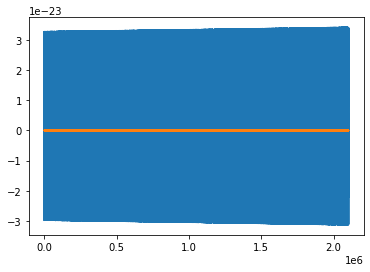

In [4]:
plt.plot(withoutproca.real)
plt.plot(withoutproca.imag)

In [14]:
wv1 = withoutproca
wv2 = withoutproca*np.exp(1j*np.pi/2)

/home/shaunf/.local/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/shaunf/.local/lib/python3.7/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


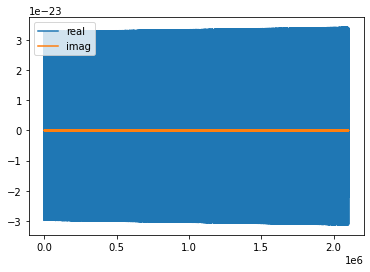

In [13]:
plt.plot(withoutproca.real, label="real")
plt.plot(withoutproca.imag,label="imag")
plt.legend()